## Context
E-commerce has become a new channel to support businesses development. Through e-commerce, businesses can get access and establish a wider market presence by providing cheaper and more efficient distribution channels for their products or services. E-commerce has also changed the way people shop and consume products and services. Many people are turning to their computers or smart devices to order goods, which can easily be delivered to their homes.

## Content
This is a dataset of UK-based B2C e-commerce sales transactions for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.
The dataset contains 500K rows and 8 columns. The following is the description of each column.

- TransactionNo (nominal): a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
- Date (numeric): the date when each transaction was generated.
- ProductNo (nominal): a five or six-digit unique character used to identify a specific product.
- Product (nominal): product/item name.
- Price (numeric): the price of each product per unit in pound sterling (£).
- Quantity (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.
- CustomerNo (nominal): a five-digit unique number that defines each customer.
- Country (nominal): name of the country where the customer resides.

# Setting the environment

In [1]:
import pandas as pd
import numpy as np
''' Data visualisation'''
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
''' Scikit-Learn'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import set_config

set_config(display='diagram')
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.metrics import confusion_matrix
''' Imbalanced Classes'''
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
''' Tensorflow Keras'''
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# importing the data 
data= pd.read_csv("../PurchaseTransactionsProject/data/Business Sales Transaction.csv", low_memory=False)

#  Data Exploration

## Data Cleaning 

In [3]:
# Data first few rows
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,536365,2018-12-01,85123A,Cream Hanging Heart T-Light Holder,1.88,6,17850.0,United Kingdom
1,536365,2018-12-01,71053,White Moroccan Metal Lantern,2.01,6,17850.0,United Kingdom
2,536365,2018-12-01,84406B,Cream Cupid Hearts Coat Hanger,1.91,8,17850.0,United Kingdom
3,536365,2018-12-01,84029G,Knitted Union Flag Hot Water Bottle,2.01,6,17850.0,United Kingdom
4,536365,2018-12-01,84029E,Red Woolly Hottie White Heart,2.01,6,17850.0,United Kingdom


In [4]:
#data extra information on the columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [5]:
data.shape

(536350, 8)

There is 536350 rows in this dataset and 8 columns. 

We can easily see in the information provided in the cells above that there are transactions registered without specifying their customerID. Thereof, since we can't impute the missing value. We're bound to delete these specific rows from the total observation. 

In addition to that: Data column needs to be transformed into DateTime type format. 

In [6]:
# droping transaction lines withtout a customer identifier
data.dropna(axis=0, subset=['CustomerNo'], inplace=True)
print("Data dimensions:", data.shape)

Data dimensions: (536295, 8)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536295 entries, 0 to 536295
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536295 non-null  object 
 1   Date           536295 non-null  object 
 2   ProductNo      536295 non-null  object 
 3   ProductName    536295 non-null  object 
 4   Price          536295 non-null  float64
 5   Quantity       536295 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536295 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [8]:
data.isnull().sum()/len(data)

TransactionNo    0.0
Date             0.0
ProductNo        0.0
ProductName      0.0
Price            0.0
Quantity         0.0
CustomerNo       0.0
Country          0.0
dtype: float64

Looks like we don't have any more missing data in this set. 

In [9]:
# Tranforming data column into DateTime variable type for the analysis. 
data["Date"]= pd.to_datetime(data.Date)
assert data.Date.dtype == 'datetime64[ns]'

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536295 entries, 0 to 536295
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536295 non-null  object        
 1   Date           536295 non-null  datetime64[ns]
 2   ProductNo      536295 non-null  object        
 3   ProductName    536295 non-null  object        
 4   Price          536295 non-null  float64       
 5   Quantity       536295 non-null  int64         
 6   CustomerNo     536295 non-null  float64       
 7   Country        536295 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [11]:
# Duplicate analysis 
print("Number of rows before duplicates:", len(data))
duplicates = data.duplicated()
print("Number of duplicated rows:", duplicates.sum())
data.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates:", len(data))

Number of rows before duplicates: 536295
Number of duplicated rows: 5434
Number of rows after removing duplicates: 530861


In [12]:
# Exploring categorical columns
data.TransactionNo.nunique()

23168

In [13]:
data.tail()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
536291,C581490,2019-12-09,22178,Victorian Glass Hanging T-Light,1.79,-12,14397.0,United Kingdom
536292,C581490,2019-12-09,23144,Zinc T-Light Holder Stars Small,1.62,-11,14397.0,United Kingdom
536293,C581568,2019-12-09,21258,Victorian Sewing Box Large,3.14,-5,15311.0,United Kingdom
536294,C581569,2019-12-09,84978,Hanging Heart Jar T-Light Holder,1.69,-1,17315.0,United Kingdom
536295,C581569,2019-12-09,20979,36 Pencils Tube Red Retrospot,1.69,-5,17315.0,United Kingdom


Based on the snapshot of the table, there is one detail we need to shed lights on. The 'C' marked in some Transaction numbers refers to 'canceled' orders, we negative values for quantity. As we would like to analyze the CLV and revenue later on, we could disregard these observation since they can't fit in our formulas. 

Though, first, let's how much these Cancellations do represent in our dataset. 

In [14]:
cancel_len = len(data[data.TransactionNo.str.startswith('C')])
print("The number of canceled transactions in the dataset:",cancel_len)
print("They account for {}%".format(round((cancel_len/len(data))*100,2)))

The number of canceled transactions in the dataset: 8494
They account for 1.6%


In [15]:
# droping Canceled transactions: 
data.drop(data[data.TransactionNo.str.startswith('C')].index, inplace=True)

In [16]:
data.shape

(522367, 8)

In [17]:
len(data[data.TransactionNo.str.startswith('C')])

0

## EDA 

### Categorical variables 

In [18]:
# Country column 
print("number of countries represented in the dataset :", set(data.Country))
data.Country.nunique()

number of countries represented in the dataset : {'Sweden', 'Norway', 'Switzerland', 'Bahrain', 'France', 'Lebanon', 'Japan', 'Italy', 'Finland', 'Poland', 'Greece', 'Lithuania', 'Hong Kong', 'Israel', 'Saudi Arabia', 'Channel Islands', 'EIRE', 'United Arab Emirates', 'Malta', 'Austria', 'Belgium', 'Brazil', 'European Community', 'Singapore', 'Australia', 'Denmark', 'Iceland', 'RSA', 'Canada', 'Spain', 'Netherlands', 'Germany', 'Cyprus', 'Portugal', 'Czech Republic', 'United Kingdom', 'Unspecified', 'USA'}


38

38 countries represented in our transactional dataset. 
Let's visualize the distribution of transactions per country 

In [19]:
temp = data[["CustomerNo", "TransactionNo", "Country"]].groupby(["CustomerNo", "TransactionNo", "Country"]).count()

In [20]:
temp = temp.reset_index()
temp

,CustomerNo,TransactionNo,Country
0,12004.0,551004,United Kingdom
1,12006.0,552006,United Kingdom
2,12008.0,546008,United Kingdom
3,12013.0,539013,United Kingdom
4,12024.0,557024,United Kingdom
...,...,...,...
19784,18283.0,579673,United Kingdom
19785,18283.0,580872,United Kingdom
19786,18287.0,554065,United Kingdom
19787,18287.0,570715,United Kingdom


In [21]:
countries = temp.Country.value_counts()

In [22]:
!pip install plotly

In [24]:
# visualizing the results in a choloropleth
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

data_viz = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data_viz], layout = layout)
iplot(choromap, validate=False)

From the map plot, we can largely see that the dataset is dominated by the UK in terms of number of transactions made. 

In [26]:
# Product names columns
data.ProductName.nunique()

3753

In [77]:
data.ProductName.value_counts().reset_index()

,index,ProductName
0,Cream Hanging Heart T-Light Holder,2324
1,Jumbo Bag Red Retrospot,2112
2,Regency Cakestand 3 Tier,2009
3,Party Bunting,1701
4,Lunch Bag Red Retrospot,1584
...,...,...
3748,"Pearl & Shell 42""Neckl Ivory",1
3749,Red Rose And Lace C/Cover,1
3750,Lily Brooch White/Silver Colour,1
3751,Capiz Chandelier,1


We can deter the top 5 purchased items throughout the year : 
1. Cream Hanging Heart T-Light Holder
2. 	Jumbo Bag Red Retrospot	
3.	Regency Cakestand 3 Tier	
4.	Party Bunting	
5. 	Lunch Bag Red Retrospot

In [79]:
data.groupby(['CustomerNo', 'TransactionNo'])["ProductName"].nunique()

CustomerNo  TransactionNo
12004.0     551004            56
12006.0     552006             1
12008.0     546008           203
12013.0     539013             1
12024.0     557024             5
                            ... 
18283.0     579673            39
            580872            50
18287.0     554065            27
            570715            38
            573167             3
Name: ProductName, Length: 19789, dtype: int64

In [31]:
pd.DataFrame([{"Number of products": len(data.ProductNo.value_counts()),
               "Number of transactions": data.TransactionNo.nunique(),
               "Number of Customers": len(data.CustomerNo.value_counts())
    
}], columns=["Number of products", "Number of transactions","Number of Customers"], index =["counts"])

,Number of products,Number of transactions,Number of Customers
counts,3753,19789,4718


In sum, 1978 transactions were passed for 4718 customers who purchased 3753 products.

In [49]:
# Number of products purchased in each transaction
prod_per_trans = data.groupby(["CustomerNo", "TransactionNo"], as_index=False)['ProductNo'].count()


In [53]:
prod_per_trans.sort_values(by='CustomerNo', ascending=False)

,CustomerNo,TransactionNo,ProductNo
19788,18287.0,573167,3
19787,18287.0,570715,38
19786,18287.0,554065,29
19778,18283.0,560032,1
19770,18283.0,540350,57
...,...,...,...
4,12024.0,557024,5
3,12013.0,539013,1
2,12008.0,546008,203
1,12006.0,552006,1


We could definitely notice 2 things:
- Customers who visit to eventually purchase one item per transaction 
- Customers who visit to purchase a massive amount of items in only one transaction 

## Basket price 

For us to calculate the monetary value of each customer, we'll need to engineer a new column : Total sum or Revenue

In [54]:
data.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country'],
      dtype='object')

In [57]:
import datetime as dt

In [58]:
data['TotalSum']= data.Price*data.Quantity

def get_month(x):
    return dt.datetime(x.year, x.month, 1)
data["TransacMonth"]= data.Date.apply(get_month)


In [69]:
grouping = data.groupby(['TransacMonth'])[['Quantity', 'ProductNo']].count()


In [70]:
grouping 

,Quantity,ProductNo
TransacMonth,,
2018-12-01,40899,40899
2019-01-01,33860,33860
2019-02-01,26759,26759
2019-03-01,35317,35317
2019-04-01,28707,28707
2019-05-01,35756,35756
2019-06-01,35533,35533
2019-07-01,38138,38138
2019-08-01,34092,34092


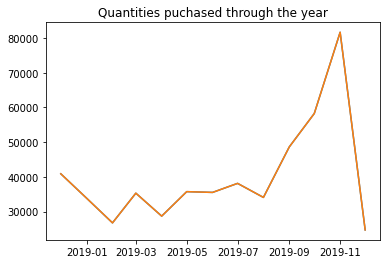

In [74]:
plt.plot(grouping)
plt.title('Quantities puchased through the year');

The plot above showcases the pick of purchases happening in the month of November 2019, with a steep increese from August to November. This is a period of the year full of holidays and celebrations, maybe there is a seasonality to it. 

In [84]:
months = data.groupby(['TransacMonth']).agg({ "Quantity":["count", "mean"],
                                    "TotalSum": ["sum", "mean"]    
})
months.columns = ["Quantity", "Avg_Quantity", "TotalSales", "AvgSales"]

In [85]:
months

,Quantity,Avg_Quantity,TotalSales,AvgSales
TransacMonth,,,,
2018-12-01,40899,8.738771,652244.79,15.947695
2019-01-01,33860,11.409687,680083.00,20.085145
2019-02-01,26759,10.560447,499868.72,18.680396
2019-03-01,35317,10.669281,668572.86,18.930624
2019-04-01,28707,10.711987,538298.00,18.751454
2019-05-01,35756,11.035127,702605.54,19.650004
2019-06-01,35533,10.934483,693390.31,19.513982
2019-07-01,38138,10.455451,700828.23,18.376114
2019-08-01,34092,12.357327,740294.03,21.714597


Text(0.5, 1.0, 'Total sales per month ')

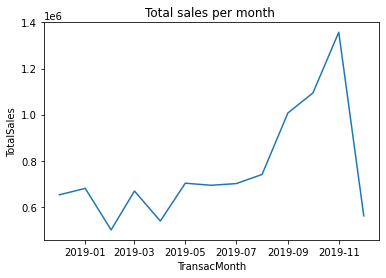

In [92]:
palette = sns.color_palette("tab10")
sns.lineplot(data=months, x=months.index, y=months.TotalSales, palette=palette)
plt.title('Total sales per month ')

# Cohort Analysis 

# RFM Analysis and Segmentation 

# Purchase Prediction 